# cases analysis

- statewise most cases (last 3 years 16 to 18)
- average time between filing and first hearing (sample entire dataset, 100k)
- in last 3 years, judge with most cases handled (criminal)
- trend in number of criminal cases over the years (3 years)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## import data of the last 3 years

In [2]:
case_2016 = pd.read_csv('cases/cases_2016.csv')

In [3]:
case_2017 = pd.read_csv('cases/cases_2017.csv')

In [4]:
case_2018 = pd.read_csv('cases/cases_2018.csv')

In [5]:
cases_3_years = pd.concat([case_2016, case_2017, case_2018])

In [6]:
del case_2016
del case_2017
del case_2018

- import the cases_state_key.csv to get the name of the states and map it to the dataset

In [7]:
state_map= pd.read_csv('keys/cases_state_key.csv')
state_mapping = state_map.set_index('state_code')['state_name'].to_dict()

cases_3_years['state_name'] = cases_3_years['state_code'].map(state_mapping)

In [8]:
del state_map
del state_mapping

In [9]:
cases_3_years = cases_3_years.sample(frac=0.0025)

# state-wise year-wise most cases

In [10]:
plot1=cases_3_years.groupby(['state_name'])['year'].value_counts().unstack(fill_value=0)

In [11]:
plot1

year,2016,2017,2018
state_name,,,
Andhra Pradesh,665,732,765
Assam,381,528,575
Bihar,938,1211,1524
Chandigarh,80,87,101
Chhattisgarh,449,512,552
DNH at Silvasa,0,1,5
Delhi,754,1010,1032
Diu and Daman,6,4,4
Goa,79,78,98


<Axes: title={'center': 'State-wise total crime distribution'}, xlabel='State Name', ylabel='Count of cases'>

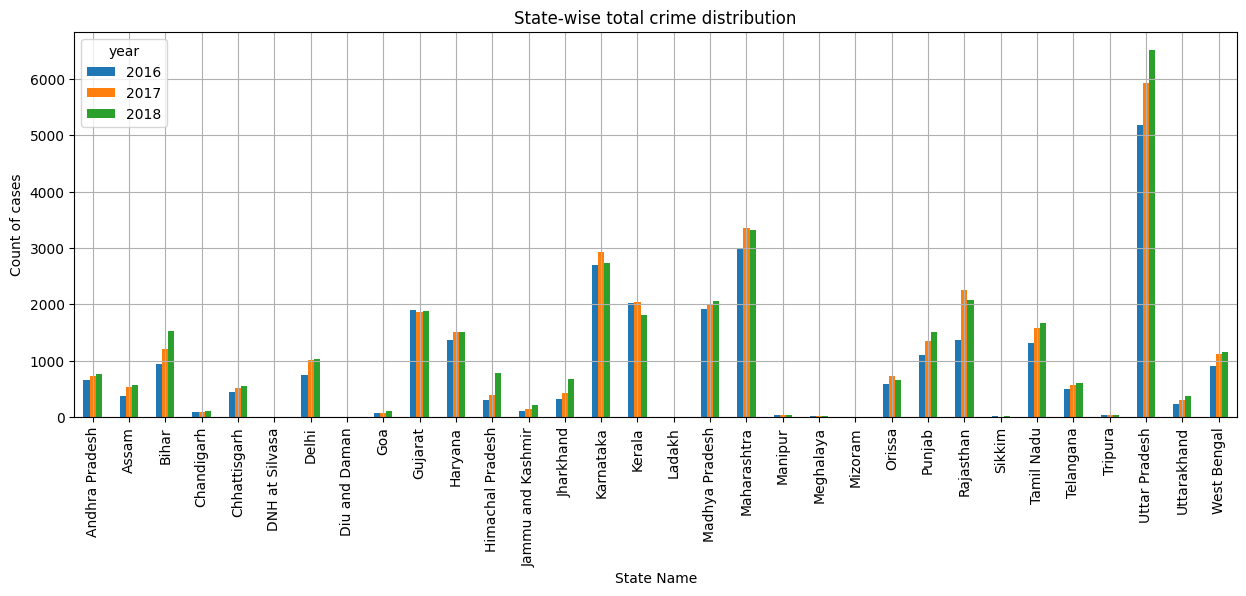

In [12]:
plot1.plot(kind='bar', title='State-wise total crime distribution', ylabel='Count of cases',
         xlabel='State Name', figsize=(15, 5), grid=True)

In [13]:
del plot1

# state-wise, year-wise, most criminal cases

In [14]:
acts_section = pd.read_csv('acts_sections.csv')

C:\Users\karun\AppData\Local\Temp\ipykernel_26700\1934652849.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  acts_section = pd.read_csv('acts_sections.csv')


In [15]:
cases_3_years= pd.merge(cases_3_years, acts_section, how='left', on='ddl_case_id')

In [16]:
plot2=cases_3_years.groupby(['state_name', 'year'])['criminal'].sum().unstack(fill_value=0)

In [17]:
plot2

year,2016,2017,2018
state_name,,,
Andhra Pradesh,240.0,231.0,256.0
Assam,185.0,197.0,244.0
Bihar,702.0,864.0,1104.0
Chandigarh,9.0,8.0,20.0
Chhattisgarh,156.0,197.0,192.0
DNH at Silvasa,0.0,1.0,3.0
Delhi,194.0,280.0,331.0
Diu and Daman,2.0,0.0,1.0
Goa,14.0,14.0,16.0


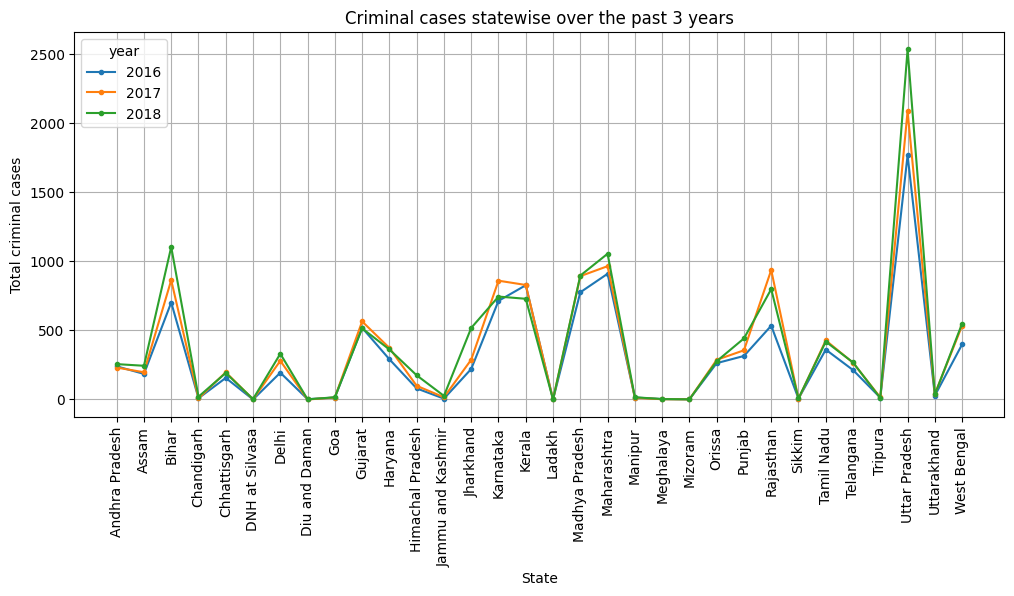

In [18]:
plot2.plot(kind='line', rot='vertical', figsize=(12,5), marker='.', grid=True)
plt.xticks(range(0,len(plot2.index)), plot2.index)
plt.xlabel('State')
plt.ylabel('Total criminal cases')
plt.title('Criminal cases statewise over the past 3 years')
plt.show()

In [19]:
del acts_section
del plot2

- from the above two graphs, it is clear that UP has the highest crime rate in terms of criminal as well as over number of cases

# top 10 judges with most criminal cases handled

In [20]:
judge_case_merge = pd.read_csv('keys/judge_case_merge_key.csv')

In [21]:
judge_clean = pd.read_csv('judges_clean.csv')

In [22]:
judge_clean.head()

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014
2,3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016
3,4,1,1,1,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016
4,5,1,1,1,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018


In [23]:
judge_case_merge.rename(columns = {'ddl_decision_judge_id':'ddl_judge_id'}, inplace = True)

In [24]:
cases_3_years= pd.merge(cases_3_years, judge_case_merge, how='left', on='ddl_case_id')

In [25]:
cases_3_years= pd.merge(cases_3_years, judge_clean, how='left', on='ddl_judge_id')

In [26]:
plot3=cases_3_years.groupby(['ddl_judge_id'])['criminal'].count()

In [27]:
plot3=plot3.sort_values(ascending=False).head(10)

Text(0.5, 0, 'Judge Id')

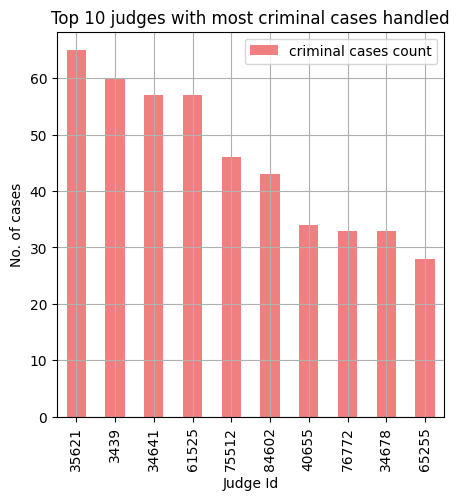

In [28]:
plotdata = pd.DataFrame({"criminal cases count": list(plot3)}, index=[str(int(i)) for i in list(plot3.index)])
plotdata.plot(kind="bar",figsize=(5, 5), color='lightcoral', grid=True)
plt.title("Top 10 judges with most criminal cases handled")
plt.ylabel("No. of cases")
plt.xlabel("Judge Id")

In [30]:
judges_clean_top_10 = judge_clean[judge_clean['ddl_judge_id'].isin(list(plot3.index))]

In [32]:
judges_clean_top_10

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
3438,3439,1,9,1,railway ner,0 nonfemale,08-06-2015,25-05-2018
34640,34641,4,9,1,1-jmfc,1 female,22-09-2018,NaN
34677,34678,4,9,1,3-jmfc,-9998 unclear,12-07-2016,NaN
35620,35621,4,15,1,judicial magistrate court,0 nonfemale,22-07-2013,NaN
40654,40655,8,1,1,district and sessions court,0 nonfemale,30-05-2017,05-01-2019
61524,61525,13,20,2,chief judicial magistrate,0 nonfemale,09-05-2016,NaN
65254,65255,13,40,3,chief judicial magistrate,0 nonfemale,23-04-2018,NaN
75511,75512,16,11,1,railway ner,1 female,14-08-2014,11-06-2018
76771,76772,16,20,53,district and sessions court,0 nonfemale,21-07-2015,31-01-2018
84601,84602,18,3,29,chief judicial magistrate,0 nonfemale,12-05-2015,14-12-2017


- from the above dataset, we can see that in the top 10 judges, 7 of them are male, 2 are female, and 1 is gender unclear